### RFE for Classification

In [2]:
from numpy import mean
from numpy import std 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [3]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)

In [6]:
rfe = RFE(estimator= DecisionTreeClassifier(), n_features_to_select= 5)
model = DecisionTreeClassifier()
pipeline = Pipeline (steps = [('s', rfe), ('m',model)])

In [7]:
#model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X,y, cv = cv,scoring= 'accuracy',n_jobs = -1)
print(' accuracy: %.3f (%.3f) ' % (mean(n_scores), std(n_scores)))

 accuracy: 0.886 (0.031) 


### RFE for regression

In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [9]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

In [10]:
rfe = RFE( estimator= DecisionTreeRegressor(), n_features_to_select= 5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps = [('s',rfe), ('m',model)])

In [14]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.081 (2.717)


## RFECV

In [15]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [16]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)

In [32]:
rfe = RFECV(estimator = DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps = [('s',rfe),('m',model)])

In [33]:
cv = RepeatedStratifiedKFold (n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score( pipeline, X,y, cv =cv, scoring ='accuracy', n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores),std(n_scores)))

Accuracy: 0.892 (0.030)


Different Base Models

In [34]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [37]:
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10,n_informative=5,n_redundant=5,random_state=1)
    return X, y

In [46]:
def get_models():
    models = dict()
    # Logistic regression
    rfe = RFE(estimator = LogisticRegression(),n_features_to_select= 5)
    model = DecisionTreeClassifier()
    models['lr']= Pipeline(steps = [('s',rfe),('m',model)])
    #perceptron
    rfe = RFE(estimator = Perceptron(),n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per']= Pipeline(steps = [('s',rfe),('m',model)])
    return models

In [47]:
def evaluate(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>lr 0.889 (0.032)
>per 0.841 (0.038)


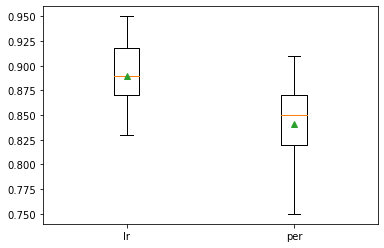

In [49]:
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()